<a href="https://colab.research.google.com/github/EnricoHuber/SoloLearn/blob/main/Machine_Learning_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Solo Learn
In this notebook we are going to cover some algorithms for classification in Python using some famous libraries.

## Statistics Review with Python

Some known statistics can be computed with Numpy. See Numpy [documentation](https://numpy.org/doc/) here.

In [ ]:
import numpy as np

data = [15, 16, 18, 19, 22, 24, 29, 30, 34]

print("mean:", np.mean(data))
print("median:", np.median(data))
print("50th percentile (median):", np.percentile(data, 50))
print("25th percentile:", np.percentile(data, 25))
print("75th percentile:", np.percentile(data, 75))
print("standard deviation:", np.std(data))
print("variance:", np.var(data))

mean: 23.0
median: 22.0
50th percentile (median): 22.0
25th percentile: 18.0
75th percentile: 29.0
standard deviation: 6.342099196813483
variance: 40.22222222222222


Data manipulation is down via Pandas. See Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/) here.

In [ ]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
print(df.head())
print(df.describe())

   Survived  Pclass     Sex   Age  Siblings/Spouses  Parents/Children     Fare
0         0       3    male  22.0                 1                 0   7.2500
1         1       1  female  38.0                 1                 0  71.2833
2         1       3  female  26.0                 0                 0   7.9250
3         1       1  female  35.0                 1                 0  53.1000
4         0       3    male  35.0                 0                 0   8.0500
         Survived      Pclass  ...  Parents/Children       Fare
count  887.000000  887.000000  ...        887.000000  887.00000
mean     0.385569    2.305524  ...          0.383315   32.30542
std      0.487004    0.836662  ...          0.807466   49.78204
min      0.000000    1.000000  ...          0.000000    0.00000
25%      0.000000    2.000000  ...          0.000000    7.92500
50%      0.000000    3.000000  ...          0.000000   14.45420
75%      1.000000    3.000000  ...          0.000000   31.13750
max      1.000

In [ ]:
col = df['Fare']
print(col)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64


In [ ]:
# You can create a small subdataframe
small_df = df[['Age', 'Sex', 'Survived']]
print(small_df.head())

# We create a new column with boolean values as regarding to sex
df['male'] = df['Sex'] == 'male'
print(df.head())

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0
   Survived  Pclass     Sex  ...  Parents/Children     Fare   male
0         0       3    male  ...                 0   7.2500   True
1         1       1  female  ...                 0  71.2833  False
2         1       3  female  ...                 0   7.9250  False
3         1       1  female  ...                 0  53.1000  False
4         0       3    male  ...                 0   8.0500   True

[5 rows x 8 columns]


In [ ]:
# One can convert Pandas Dataframe into a Pandas Series and then into a Numpy Array
print(df['Fare'].values)
print(df[['Pclass', 'Fare', 'Age']].values)
arr = df[['Pclass', 'Fare', 'Age']].values
print(arr.shape)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.      41.5792   7.8792   8.05    15.5      7.75    21.6792
  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5     10.5
   7.2292  27.75    46.9      7.2292  80.      83.475   27.9     27.7208
  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9     73.5
  14.4542  56.4958   7.65     7.8958   8.05    29.      12.475    9.
   9.5      7.7875  47.1     10.5     15.85    34.375    8.05   263.
   8.05     8.05     7.8542  61.175   20.575    7.25     8.05    34.6542
  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542   7.925
   7.8958   7.65     7.775    7.8958  24.15    52.      14.4542   8.05
   

In [ ]:
# You can also select some elements
print(arr[0, 1])
print(arr[0])
print(arr[:, 2])

7.25
[ 3.    7.25 22.  ]
[22.   38.   26.   35.   35.   27.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   23.   31.   22.   35.   34.   15.   28.
  8.   38.   26.   19.   24.   23.   40.   48.   18.   66.   28.   42.
 18.   21.   18.   14.   40.   27.    3.   19.   30.   20.   27.   16.
 18.    7.   21.   49.   29.   65.   46.   21.   28.5   5.   11.   22.
 38.   45.    4.   64.    7.   29.   19.   17.   26.   32.   16.   21.
 26.   32.   25.   23.   28.    0.83 30.   22.   29.   31.   28.   17.
 33.   16.   20.   23.   24.   29.   20.   46.   26.   59.   22.   71.
 23.   34.   34.   28.   29.   21.   33.   37.   28.   21.   29.   38.
 28.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 19.   32.5  32.5  54.   12.   19.   24.    2.   45.   33.   20.   47.
 29.   25.   23.   19.   37.   16.   24.   40.   22.   24.   19.   18.
 19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  27.   51.   16.
 30.   37.    5.   44.   40.   26.   17.    1.    9.

In [ ]:
# Numpy gives the possibility to create a mask
mask = arr[:, 2] < 18       # All people who have age less than 18
print(mask)
print(mask.sum())

[False False False False False False False  True False  True  True False
 False False  True False  True False False False False False  True False
  True False False False False False False False False False False False
 False False False  True False False  True False False False False  True
 False  True False False False False False False False  True  True False
 False False  True False  True False False  True False False  True False
 False False False False False  True False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False  True False
 False False False False  True False False  True False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False  True
 False False  True False False False  True  True  T

Plotting data is usually done with Matplotlib. See Matplotlib [documentation](https://matplotlib.org/3.1.3/contents.html) here.

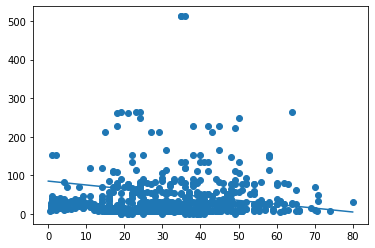

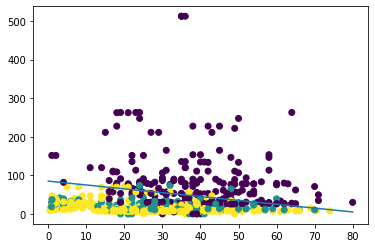

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Fare'])
plt.plot([0, 80], [85, 5])
plt.show()
plt.scatter(df['Age'], df['Fare'], c = df['Pclass'])
plt.plot([0, 80], [85, 5])
plt.show()


## Logistic Regression